In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [61]:
data = pd.read_csv('credit_card_churn.csv')
data.head(2)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105


# Checking nulls and duplicates

In [3]:
data.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [4]:
data.duplicated().sum()

0

In [5]:
data.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

# Summary Statistics

In [6]:
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


# Checking Outliers

In [7]:
data_number1= data[['Customer_Age', 'Dependent_count', 'Total_Relationship_Count','Months_on_book']]

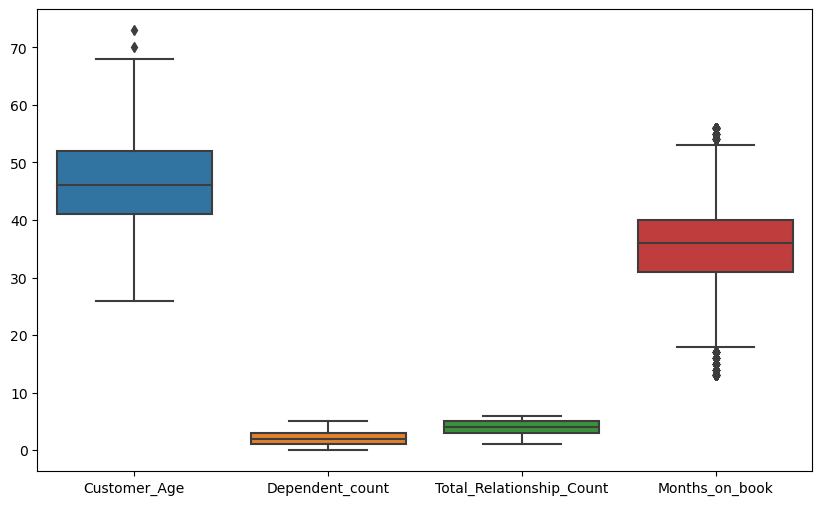

In [8]:
plt.figure(figsize=(10,6))
sns.boxplot(data= data_number1)
plt.show()

In [9]:
data_number2 = data[['Months_Inactive_12_mon','Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy']]

<AxesSubplot:>

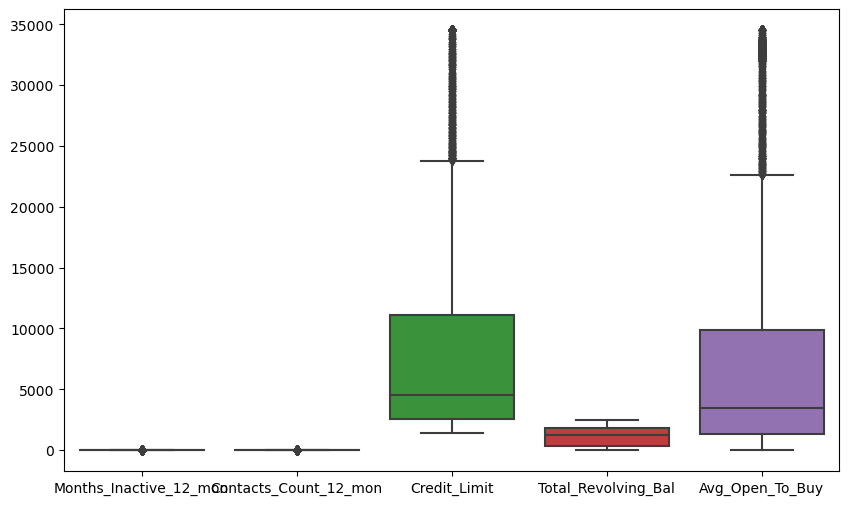

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data_number2)

In [11]:
data_number3 = data[['Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt','Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]

<AxesSubplot:>

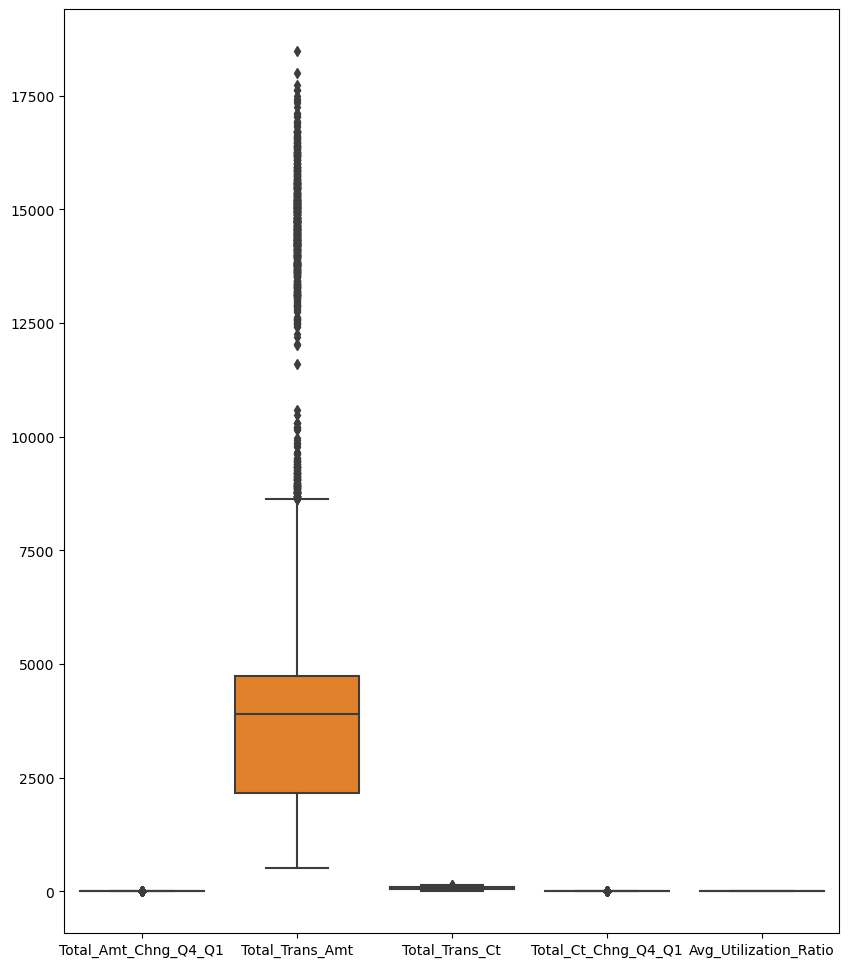

In [12]:
plt.figure(figsize=(10,12))

sns.boxplot(data=data_number3)

<AxesSubplot:ylabel='Attrition_Flag'>

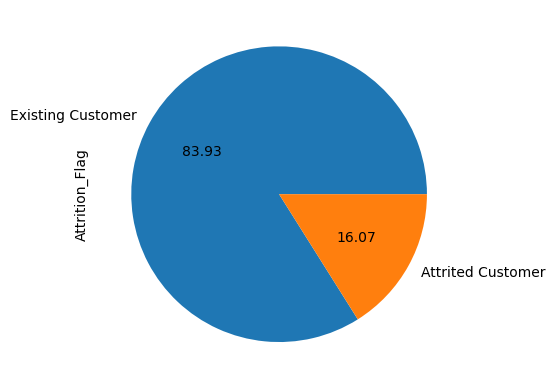

In [13]:
data['Attrition_Flag'].value_counts().plot.pie(autopct='%.2f')
#The data is not balance

In [112]:
counts = data.groupby(['Attrition_Flag','Gender']).size().unstack(fill_value=0)
counts

Gender,F,M
Attrition_Flag,,
Attrited Customer,930,697
Existing Customer,4428,4072


<AxesSubplot:ylabel='Attrition_Flag'>

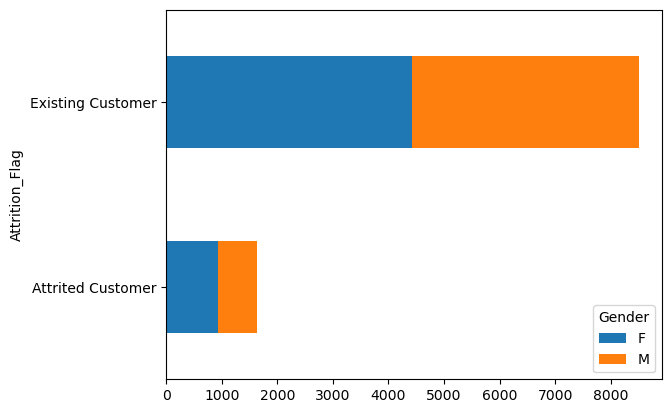

In [113]:
counts.plot(kind='barh', stacked=True)

In [114]:
counts_2 = data.groupby(['Attrition_Flag','Income_Category']).size().unstack(fill_value=0)
counts_2

Income_Category,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Unknown
Attrition_Flag,,,,,,
Attrited Customer,126,271,189,242,612,187
Existing Customer,601,1519,1213,1293,2949,925


<AxesSubplot:ylabel='Attrition_Flag'>

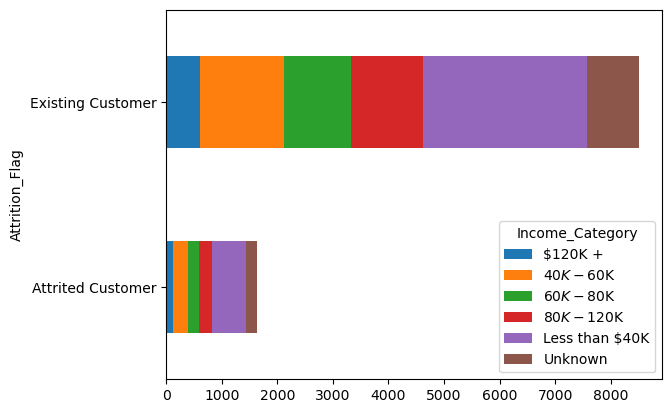

In [116]:
counts_2.plot(kind='barh', stacked=True)

In [14]:
from sklearn.preprocessing import LabelEncoder 

In [15]:
le = LabelEncoder()
data['Attrition_Flag'] = le.fit_transform(data['Attrition_Flag'])
data.head(2)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105


# Checking the correlation 

In [16]:
data_corr = data.corr()

<AxesSubplot:>

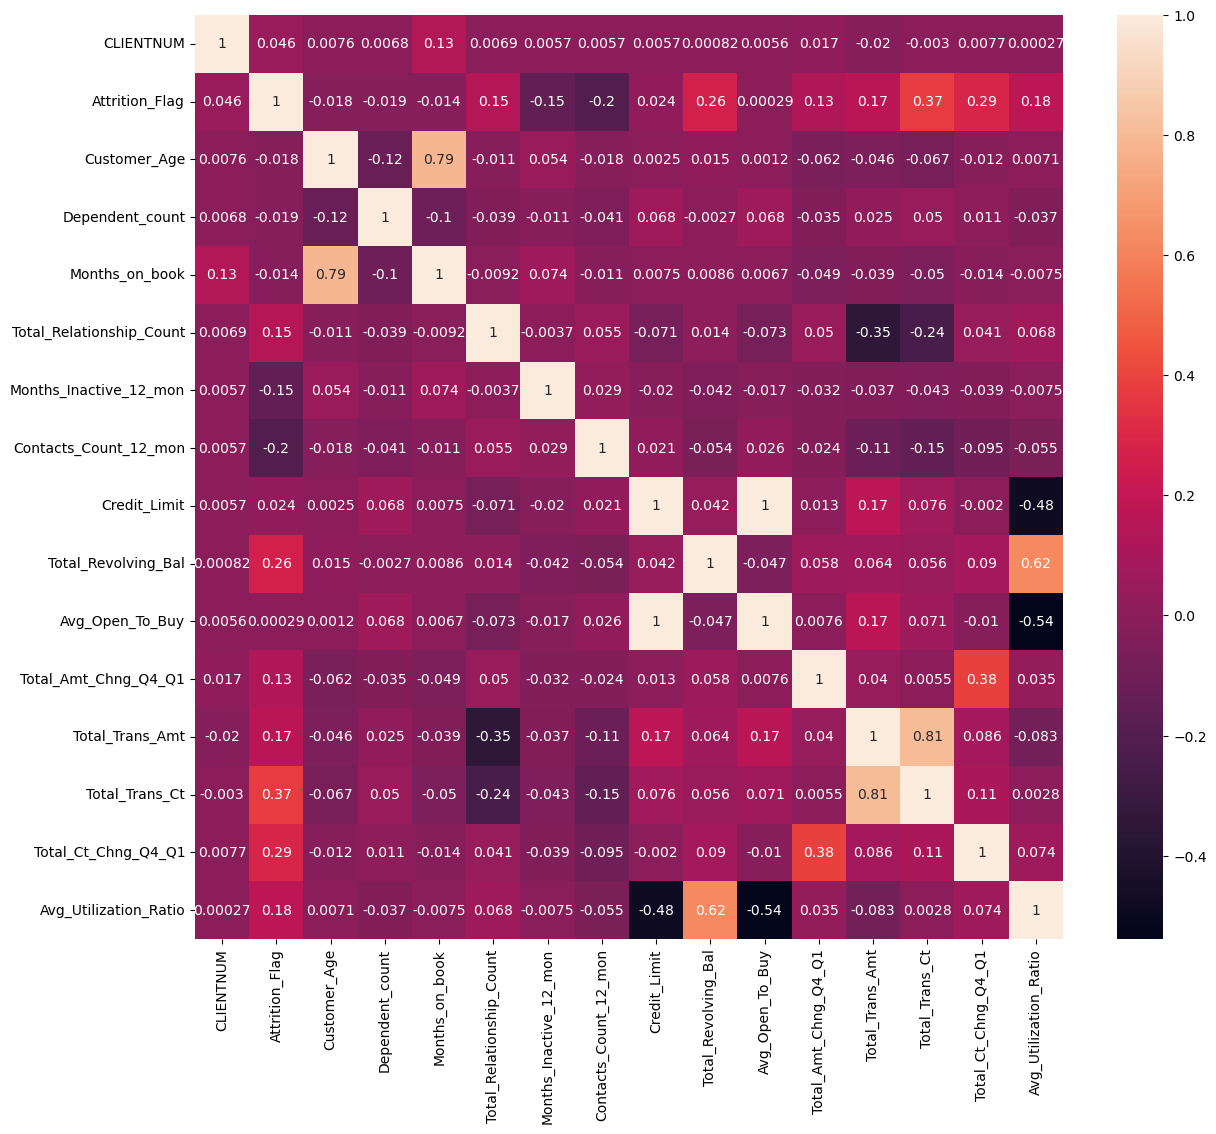

In [17]:
plt.figure(figsize=(14,12))
sns.heatmap(data_corr, cbar=True, annot=True)

# Checking the skewness

In [18]:
from scipy.stats import skew

In [19]:
Num_data = data[['Customer_Age', 'Dependent_count', 'Months_on_book',              
'Total_Relationship_Count',      
'Months_Inactive_12_mon',        
'Contacts_Count_12_mon',        
'Credit_Limit',               
'Total_Revolving_Bal',          
'Avg_Open_To_Buy',             
'Total_Amt_Chng_Q4_Q1',        
'Total_Trans_Amt',               
'Total_Trans_Ct',                
'Total_Ct_Chng_Q4_Q1',         
'Avg_Utilization_Ratio']]

Customer_Age
-0.03360003857464426


C:\Users\Romelio Villar Jr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Dependent_count
-0.02082245083419453
Months_on_book


C:\Users\Romelio Villar Jr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-0.1065495749017217


C:\Users\Romelio Villar Jr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Total_Relationship_Count
-0.16242835172024658


C:\Users\Romelio Villar Jr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Months_Inactive_12_mon
0.6329673568012449


C:\Users\Romelio Villar Jr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Contacts_Count_12_mon
0.011003996010760743


C:\Users\Romelio Villar Jr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Credit_Limit
1.6664789242587705


C:\Users\Romelio Villar Jr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Total_Revolving_Bal
-0.14881520376464566


C:\Users\Romelio Villar Jr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Avg_Open_To_Buy
1.6614504071556497


C:\Users\Romelio Villar Jr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Total_Amt_Chng_Q4_Q1
1.7318068495622156


C:\Users\Romelio Villar Jr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Total_Trans_Amt
2.0407010789778317
Total_Trans_Ct
0.1536503056777963


C:\Users\Romelio Villar Jr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Romelio Villar Jr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Total_Ct_Chng_Q4_Q1
2.063724833411372


C:\Users\Romelio Villar Jr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Avg_Utilization_Ratio
0.7179016418496336


C:\Users\Romelio Villar Jr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


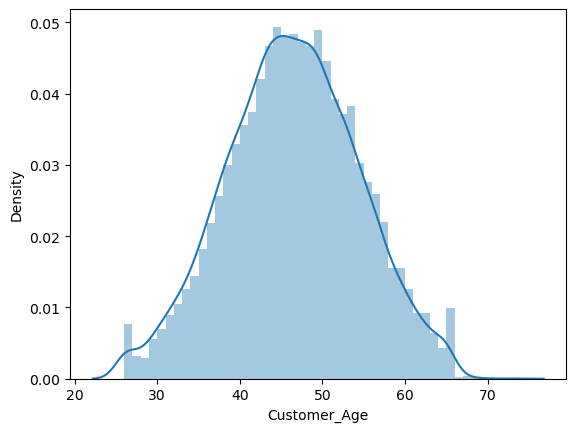

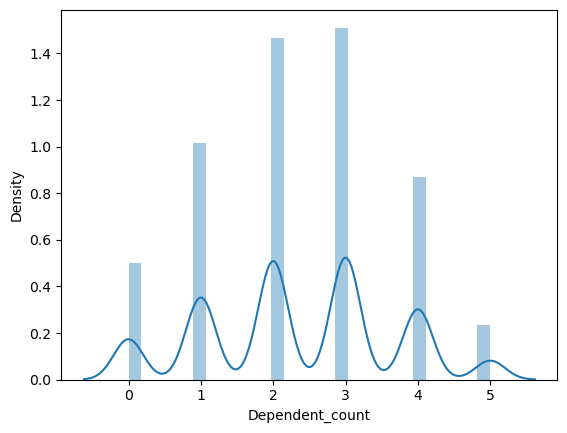

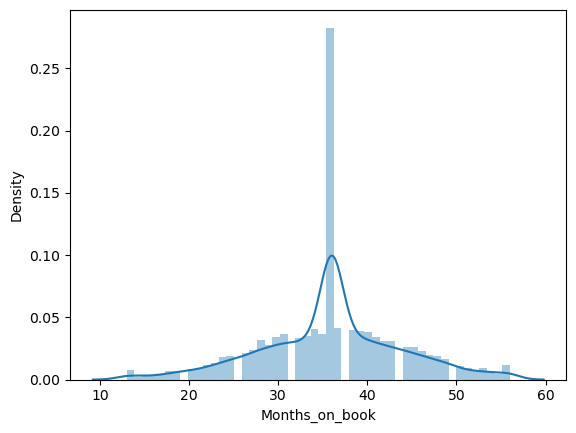

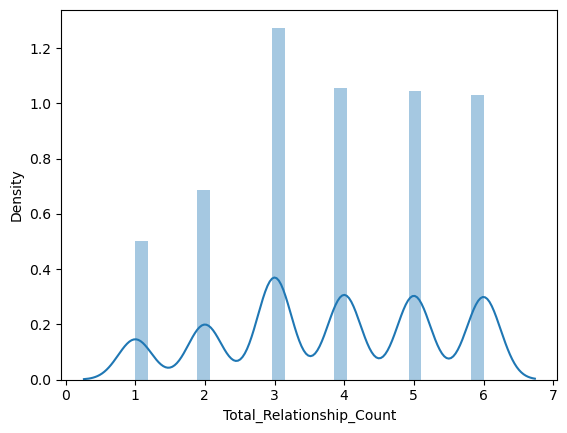

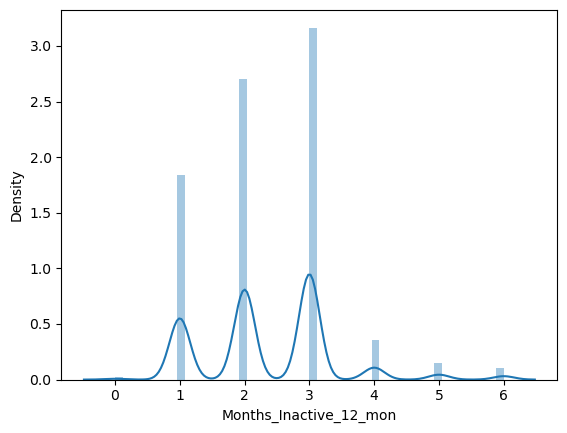

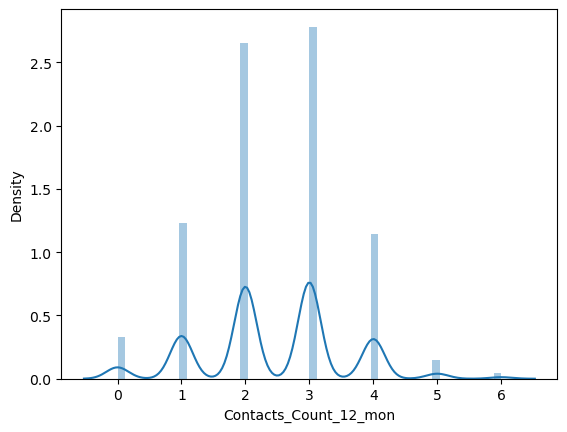

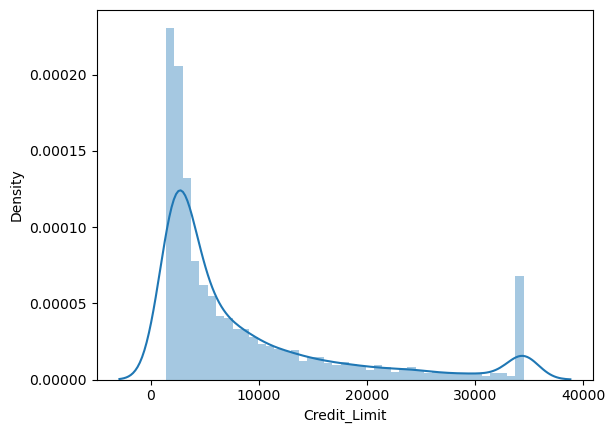

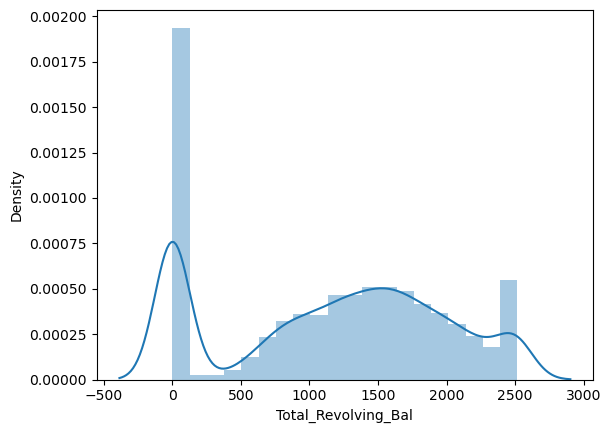

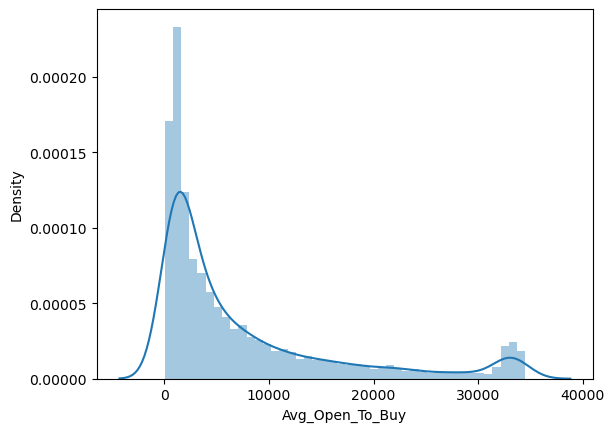

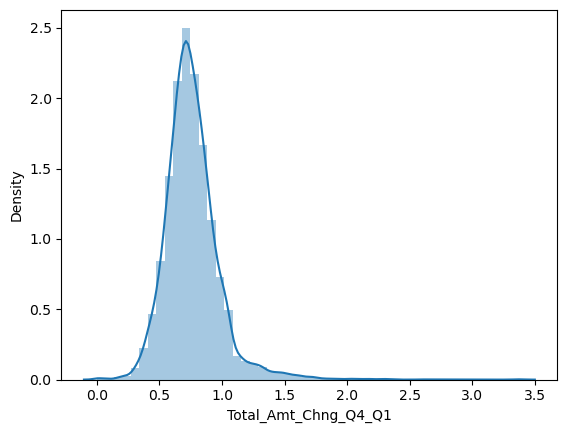

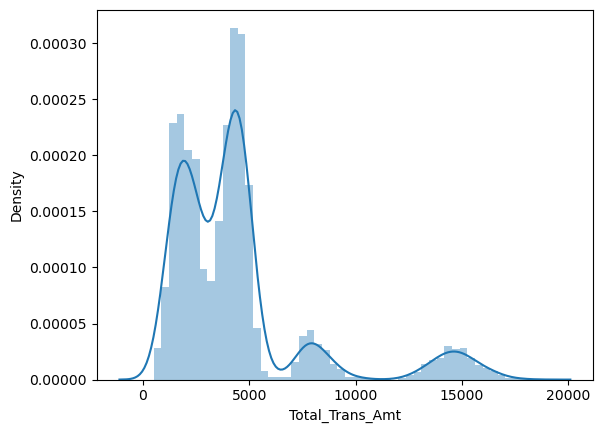

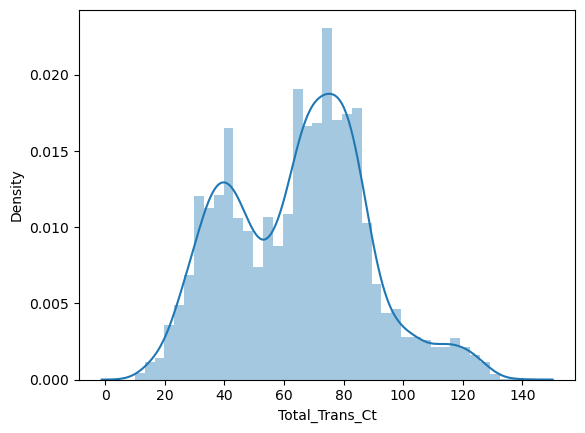

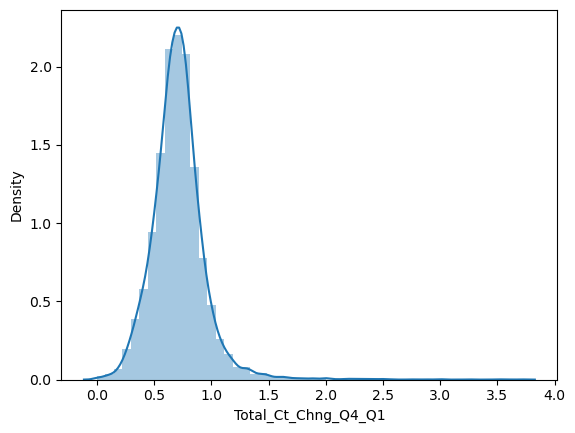

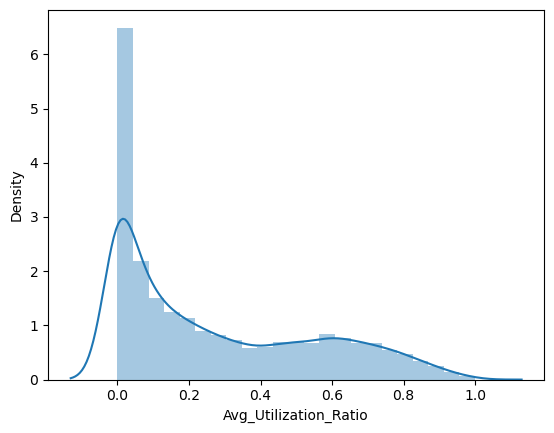

In [20]:
for col in Num_data:
    print(col)
    print(skew(Num_data[col]))
    
    plt.figure()
    sns.distplot(Num_data[col])

# Feature Selection

We will use Point Biserial. The point biserial correlation coefficient, which is a special case of Pearson’s correlation coefficient.\
It measures the relationship between two variables\
One continuous variable and One naturally binary variable.\
In our dataset, the "ATTRITION FLAG" is a binary variable.\
We will examine the correlation of numerical variables with the "Attrition_flag.

In [21]:
data['Attrition_Flag'].dtypes

dtype('int32')

In [22]:
target = data['Attrition_Flag']
feature = data[['Customer_Age', 'Dependent_count', 'Months_on_book',              
'Total_Relationship_Count',      
'Months_Inactive_12_mon',        
'Contacts_Count_12_mon',        
'Credit_Limit',               
'Total_Revolving_Bal',          
'Avg_Open_To_Buy',             
'Total_Amt_Chng_Q4_Q1',        
'Total_Trans_Amt',               
'Total_Trans_Ct',                
'Total_Ct_Chng_Q4_Q1',         
'Avg_Utilization_Ratio']]

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le = LabelEncoder()

In [25]:
data['Attrition_Flag'] = le.fit_transform(target)
data['Attrition_Flag']

0        1
1        1
2        1
3        1
4        1
        ..
10122    1
10123    0
10124    0
10125    0
10126    0
Name: Attrition_Flag, Length: 10127, dtype: int64

In [26]:
feature.astype('int32').dtypes

Customer_Age                int32
Dependent_count             int32
Months_on_book              int32
Total_Relationship_Count    int32
Months_Inactive_12_mon      int32
Contacts_Count_12_mon       int32
Credit_Limit                int32
Total_Revolving_Bal         int32
Avg_Open_To_Buy             int32
Total_Amt_Chng_Q4_Q1        int32
Total_Trans_Amt             int32
Total_Trans_Ct              int32
Total_Ct_Chng_Q4_Q1         int32
Avg_Utilization_Ratio       int32
dtype: object

In [27]:
print("Target Shape:", target.shape)
print("Feature Shape:", feature.shape)

Target Shape: (10127,)
Feature Shape: (10127, 14)


In [28]:
for column in feature.columns:
    point_biserial_corr, p_value = stats.pointbiserialr(target, feature[column])
    print(f'Feature: {column}')
    print(f'Point-Biserial Correlation: {point_biserial_corr}')
    print(f'P-value: {p_value}')

Feature: Customer_Age
Point-Biserial Correlation: -0.01820313853255065
P-value: 0.06698688501759016
Feature: Dependent_count
Point-Biserial Correlation: -0.018990596311193708
P-value: 0.056002392535092434
Feature: Months_on_book
Point-Biserial Correlation: -0.01368685117790971
P-value: 0.1684370287649442
Feature: Total_Relationship_Count
Point-Biserial Correlation: 0.15000522801913754
P-value: 4.829281002183993e-52
Feature: Months_Inactive_12_mon
Point-Biserial Correlation: -0.152448806326925
P-value: 1.0326639995930894e-53
Feature: Contacts_Count_12_mon
Point-Biserial Correlation: -0.2044905099816044
P-value: 4.697489630751521e-96
Feature: Credit_Limit
Point-Biserial Correlation: 0.023872994836161524
P-value: 0.01628535720539447
Feature: Total_Revolving_Bal
Point-Biserial Correlation: 0.2630528831292032
P-value: 6.630148455417239e-160
Feature: Avg_Open_To_Buy
Point-Biserial Correlation: 0.00028507749393779595
P-value: 0.977116089445888
Feature: Total_Amt_Chng_Q4_Q1
Point-Biserial Corr

In [29]:
data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,1,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,1,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,1,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,1,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,0,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,0,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,0,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [30]:
from sklearn.preprocessing import LabelEncoder as le

le = LabelEncoder()
data['Marital_Status'] = le.fit_transform(data['Marital_Status'])

le = LabelEncoder()
data['Education_Level'] = le.fit_transform(data['Education_Level'])

le = LabelEncoder()
data['Card_Category'] = le.fit_transform(data['Card_Category'])

# Encode 'Gender'
data['Gender'] = le.fit_transform(data['Gender'])

# Encode 'Income_Category'
data['Income_Category'] = le.fit_transform(data['Income_Category'])
data.head(2)



,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,1,3,3,1,2,0,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,0,5,2,2,4,0,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105


In [31]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [32]:
target.dtypes

dtype('int32')

In [33]:
categorical_fetaures = data[['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']]

In [34]:
from sklearn.feature_selection import chi2

In [35]:
Chi_scores = chi2(categorical_fetaures, target)

In [36]:
Chi_scores[0]

array([7.4432227 , 0.33923111, 1.30275451, 2.47516959, 0.98612022])

In [37]:
Chi_scores[1]

array([0.00636758, 0.56027338, 0.25371069, 0.11565697, 0.32069248])

<AxesSubplot:>

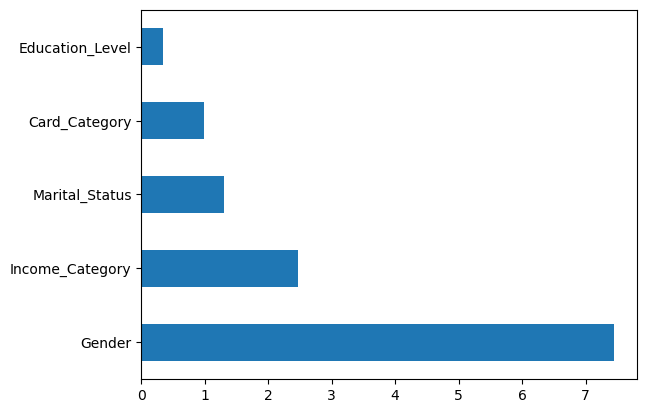

In [38]:
Chi_values = pd.Series(Chi_scores[0], categorical_fetaures.columns)
Chi_values.sort_values(ascending=False, inplace=True)
Chi_values.plot(kind='barh') #the higher the better

In [39]:
P_values = pd.Series(Chi_scores[1], categorical_fetaures.columns)
P_values.sort_values(ascending=False, inplace=True)
P_values

Education_Level    0.560273
Card_Category      0.320692
Marital_Status     0.253711
Income_Category    0.115657
Gender             0.006368
dtype: float64

<AxesSubplot:>

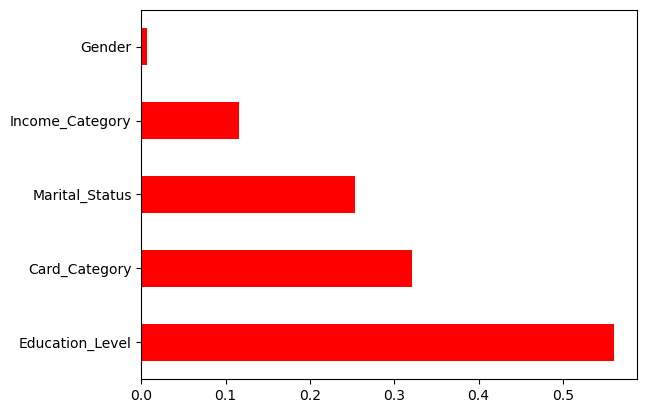

In [40]:
P_values.plot(kind='barh', color='red') #The lower the better

In [41]:
Finaldata = data[['Attrition_Flag', 'Gender', 'Income_Category', 'Total_Trans_Ct', 'Avg_Utilization_Ratio', 'Total_Revolving_Bal', 'Months_Inactive_12_mon', 'Total_Trans_Amt', 'Total_Amt_Chng_Q4_Q1']]

In [42]:
X = Finaldata.drop('Attrition_Flag', axis=1)
y = Finaldata['Attrition_Flag']

In [49]:
data.head(2)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,1,3,3,1,2,0,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,0,5,2,2,4,0,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
